## Importing Libraries

In [1]:
import pandas as pd
import numpy as nm
import math
import scipy
import random

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#### Reading the Data From the CSV File

In [2]:
data = pd.read_csv(r"C:\Users\KUMAR SAMPURN\Documents\SEM 3\SDS\code\salinity-calcofi-case-study.csv" ,low_memory=False)

``` Checking the Head  to Ensure the File is read Properly```

In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Data Description Statistics 

``` (a) Structure of the Dataset ```

In [4]:
data.shape

(864863, 74)

```(b) Mean Max and Min of Salinity```

In [5]:
print("Salinity Mean: ", data['Salnty'].mean())

Salinity Mean:  33.84035029388055


In [6]:
print("Salinity Max: ", data['Salnty'].max())

Salinity Max:  37.034


In [7]:
print("Salinity Min: ", data['Salnty'].min())

Salinity Min:  28.431


### 2. Pre-Processing

``` (a) Check For NULLs/Duplicates and Drop attributes with more than 30% data missing```

In [8]:
#checking if there are null values
data.isnull()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [9]:
#checking the total no. of null values
data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [10]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
864858    False
864859    False
864860    False
864861    False
864862    False
Length: 864863, dtype: bool

``` Dropping attributes with more than 30% data missing```

In [11]:
nulls = data.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(data)*100,2)

data_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
data_null.Attr  = nulls.index
data_null.Total = nulls.values
data_null.Percent = prcet.values

for i in data_null.Attr[data_null['Percent'] > 30]:
    data = data.drop([i], axis=1)

``` Replacing Null Values with Mode Values```

In [12]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].mode().mean(), inplace=True)

In [13]:
data.isnull()
# we can see now more fields have true value

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data.shape
# now we can see that no. of columns has reduced from 74 to 32

(864863, 32)

``` c) List Categorical Columns ```

In [15]:
data_categorical= data[['Depth_ID' , 'Salnty','STheta','R_PRES',]]
data_categorical.head()

,Depth_ID,Salnty,STheta,R_PRES
0,19-4903CR-HY-060-0930-05400560-0000A-3,33.440,25.649,0
1,19-4903CR-HY-060-0930-05400560-0008A-3,33.440,25.656,8
2,19-4903CR-HY-060-0930-05400560-0010A-7,33.437,25.654,10
3,19-4903CR-HY-060-0930-05400560-0019A-3,33.420,25.643,19
4,19-4903CR-HY-060-0930-05400560-0020A-7,33.421,25.643,20


## 3) Data Visiualisation

-  a)  Histogram

array([[<AxesSubplot:title={'center':'Cst_Cnt'}>,
        <AxesSubplot:title={'center':'Btl_Cnt'}>,
        <AxesSubplot:title={'center':'Depthm'}>,
        <AxesSubplot:title={'center':'T_degC'}>,
        <AxesSubplot:title={'center':'Salnty'}>],
       [<AxesSubplot:title={'center':'O2ml_L'}>,
        <AxesSubplot:title={'center':'STheta'}>,
        <AxesSubplot:title={'center':'O2Sat'}>,
        <AxesSubplot:title={'center':'Oxy_µmol/Kg'}>,
        <AxesSubplot:title={'center':'RecInd'}>],
       [<AxesSubplot:title={'center':'T_prec'}>,
        <AxesSubplot:title={'center':'S_prec'}>,
        <AxesSubplot:title={'center':'P_qual'}>,
        <AxesSubplot:title={'center':'Chlqua'}>,
        <AxesSubplot:title={'center':'Phaqua'}>],
       [<AxesSubplot:title={'center':'NH3q'}>,
        <AxesSubplot:title={'center':'C14A1q'}>,
        <AxesSubplot:title={'center':'C14A2q'}>,
        <AxesSubplot:title={'center':'DarkAq'}>,
        <AxesSubplot:title={'center':'MeanAq'}>],
       [<Axe

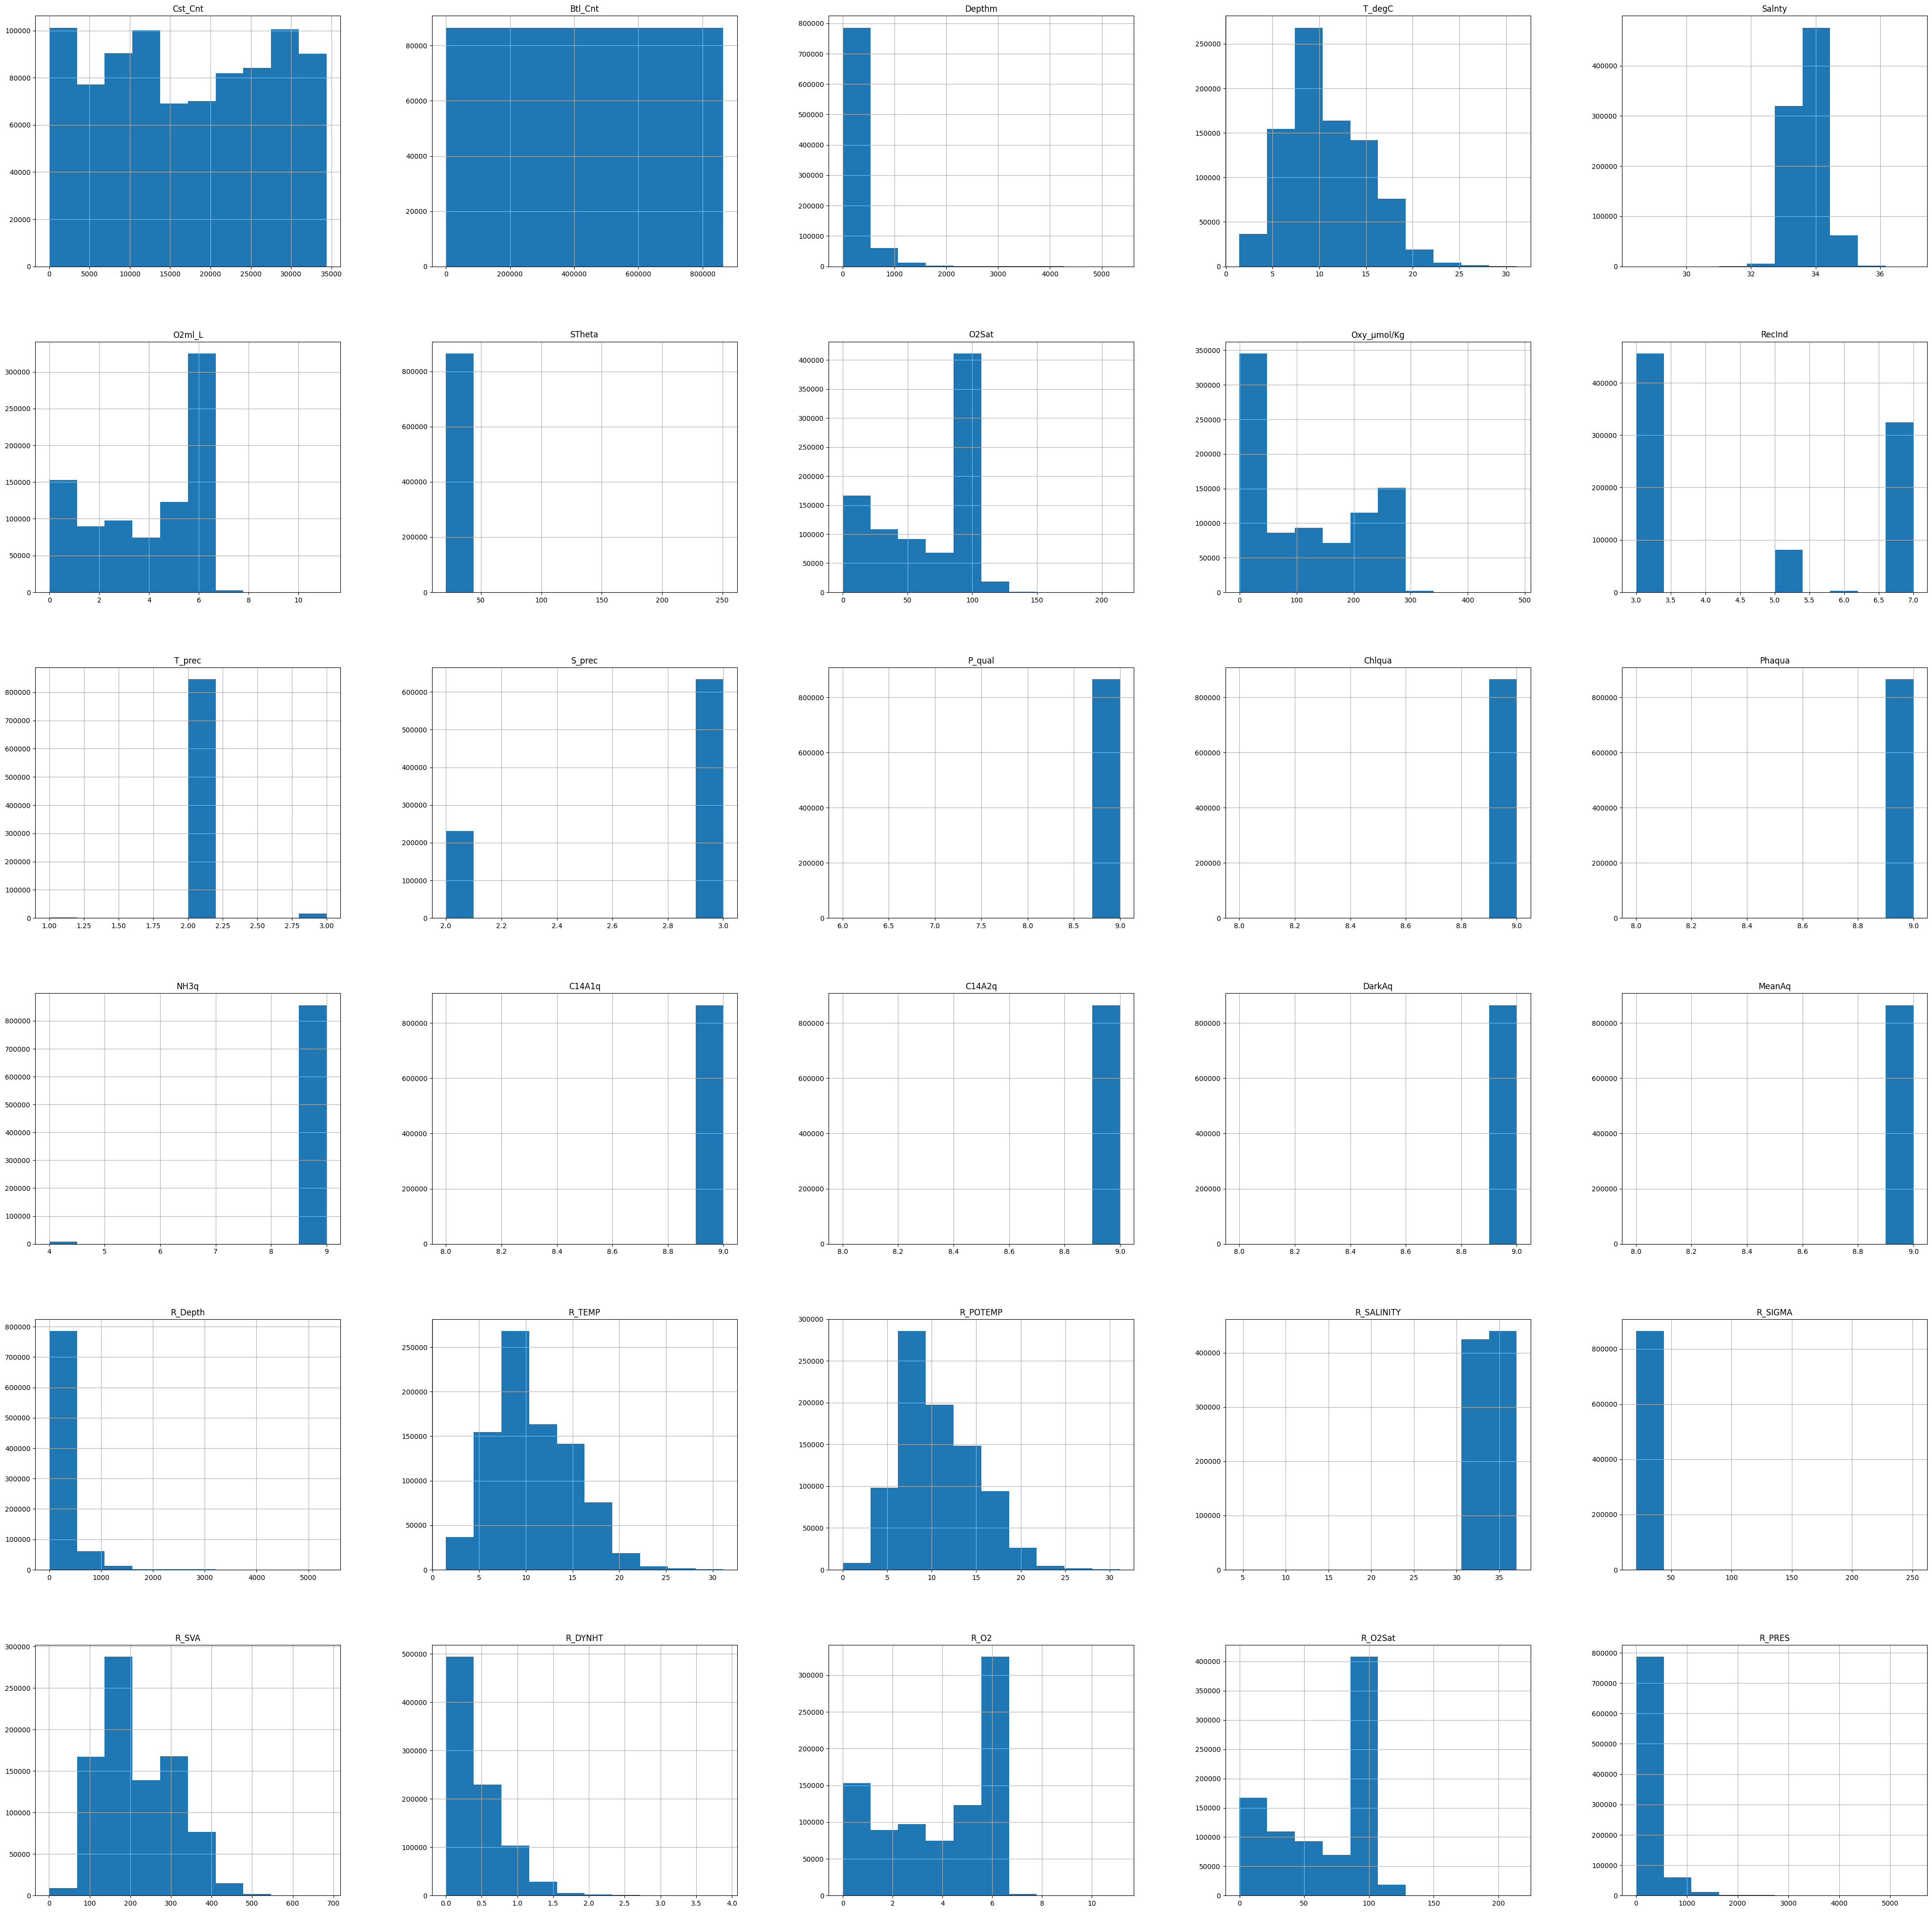

In [16]:
data.hist(figsize=(50 ,50))

``` Box Plot```

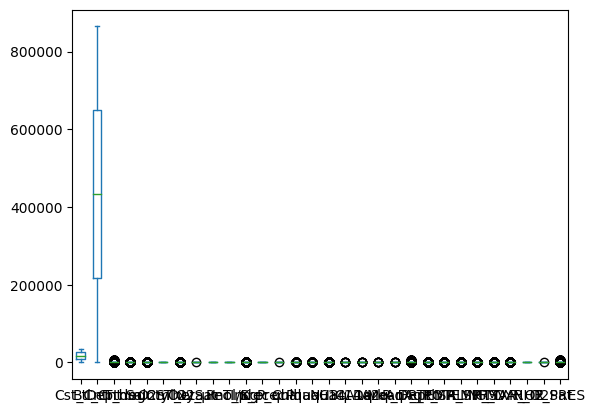

In [17]:
data.plot(kind='box');

## 4) Hypothesis Testing

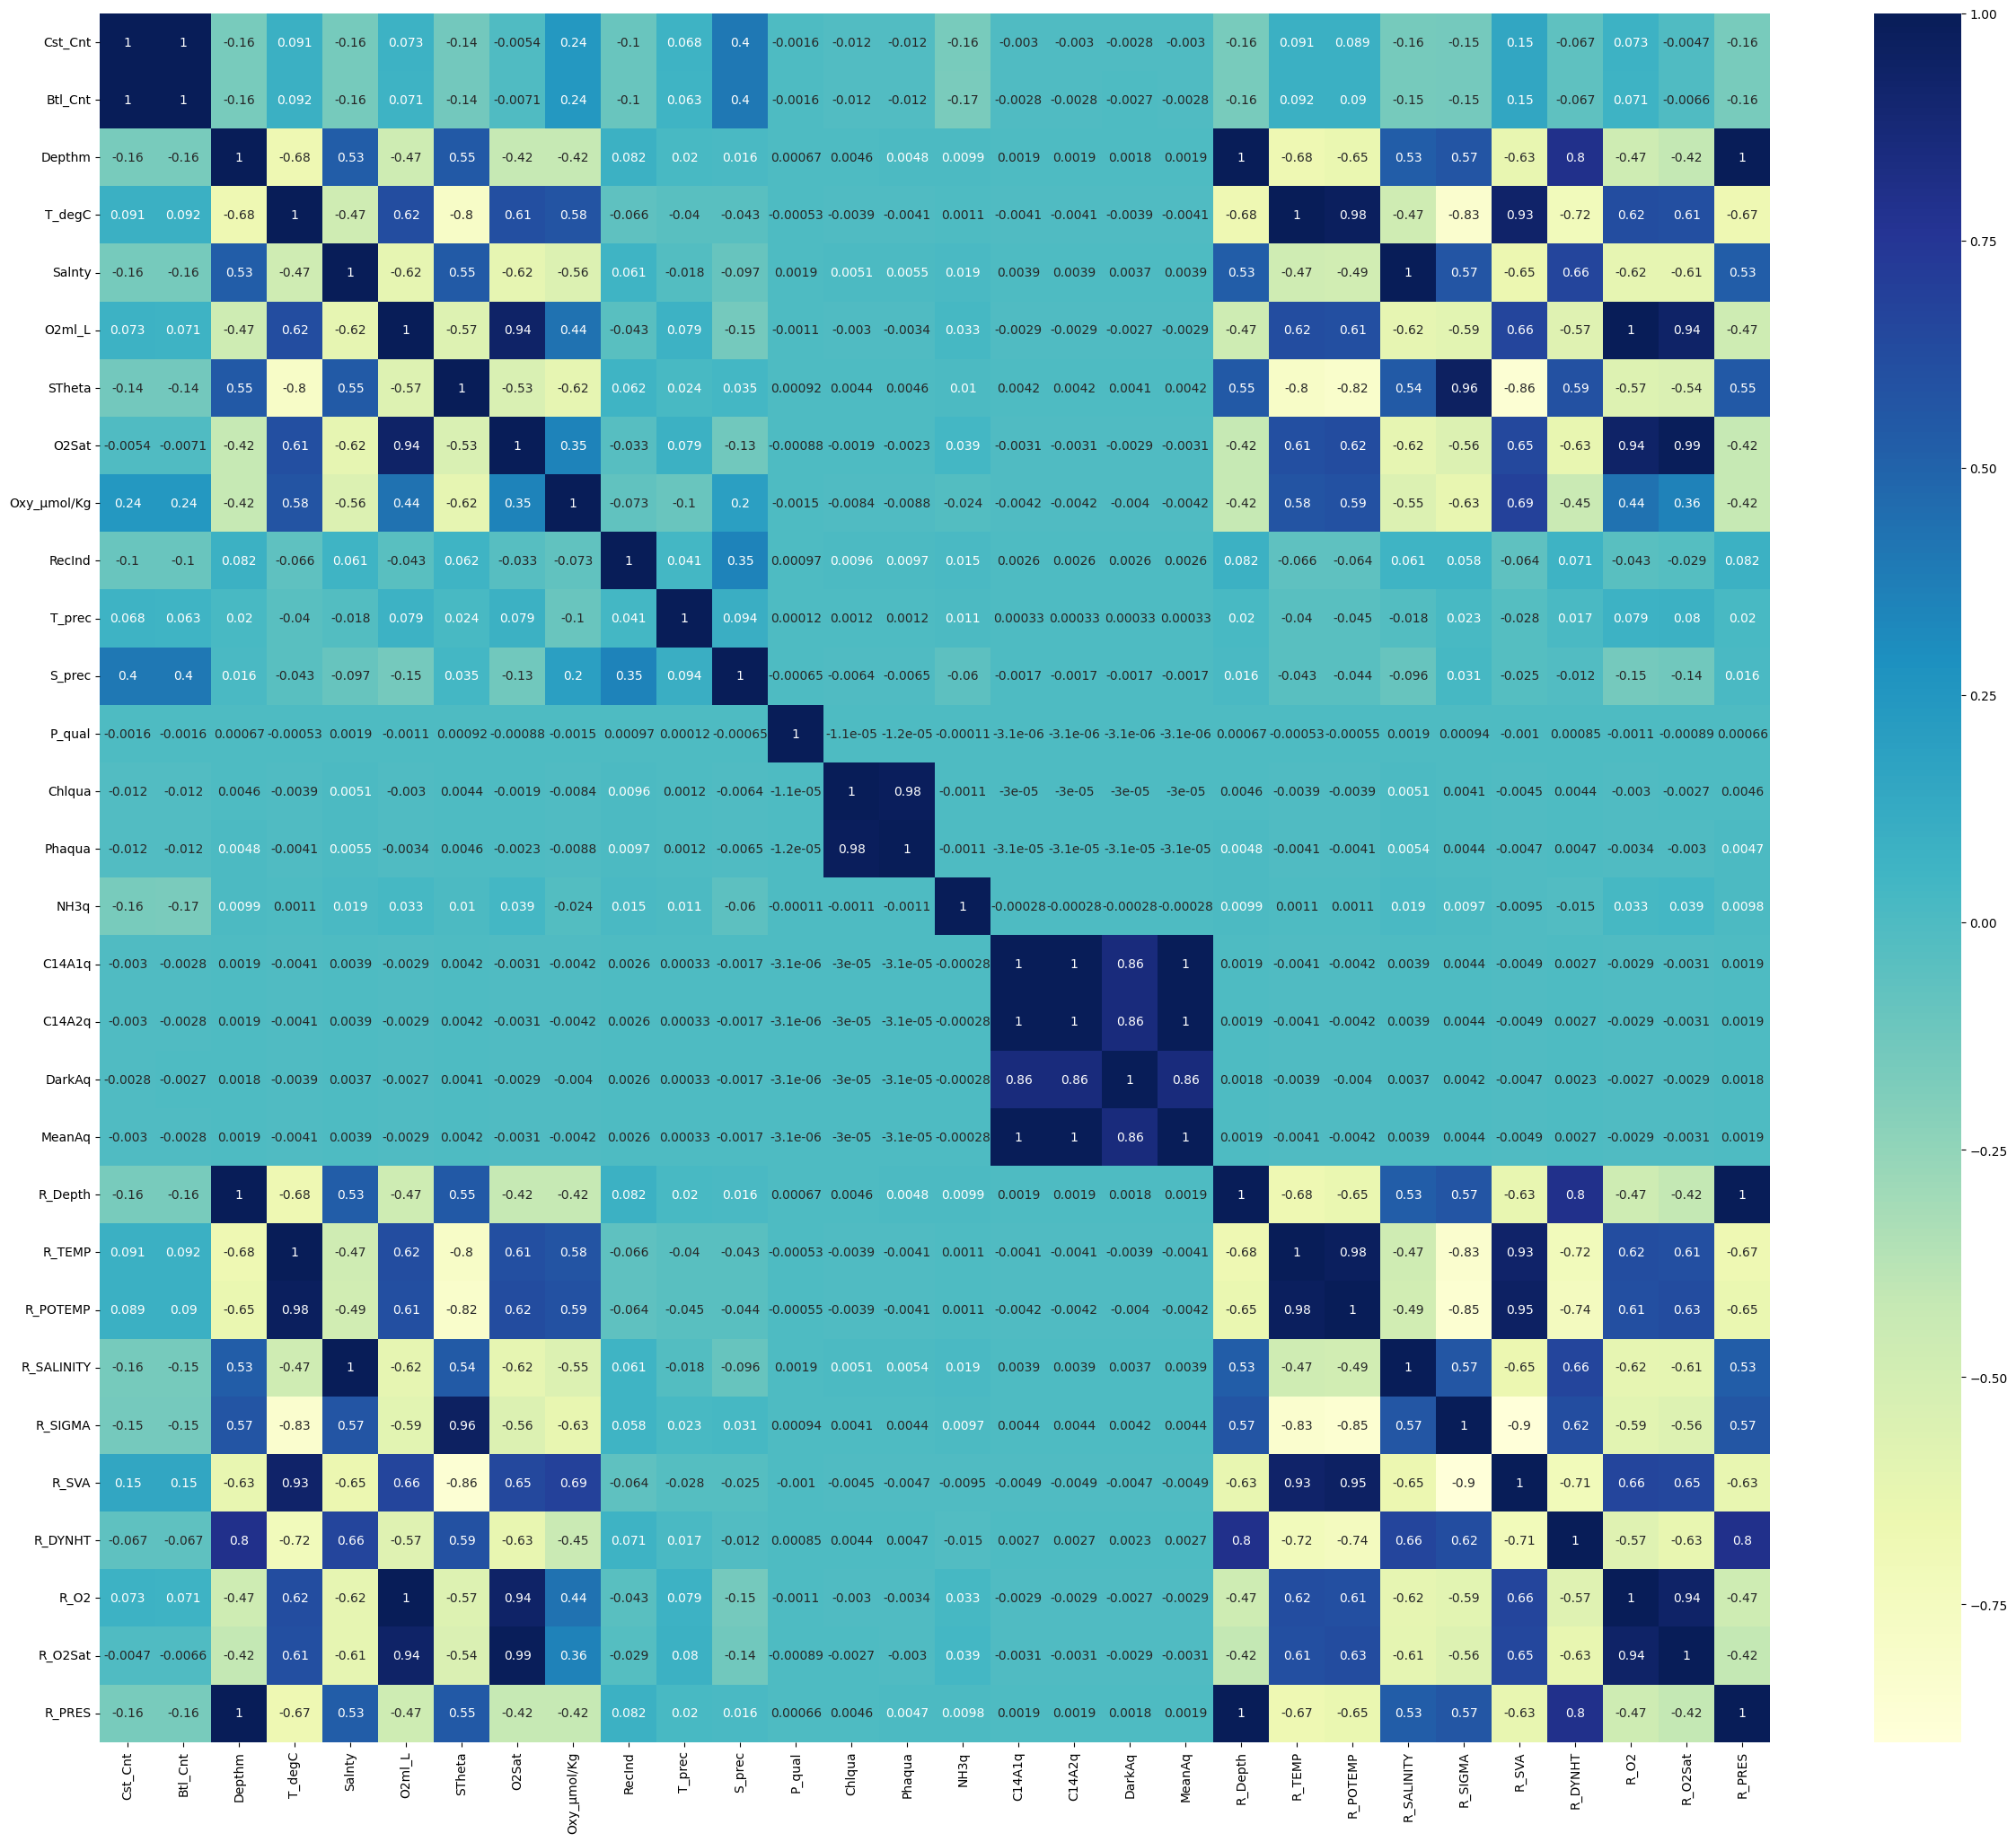

In [18]:
plt.figure(figsize = (30, 25))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building a regression model and finding the coefficients for regression

In [19]:
X = data['Salnty']
y =data['Btl_Cnt'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
print("Training data:",X_train.shape,y_train.shape)
print("Testing data:",X_test.shape,y_test.shape)


Training data: (691890,) (691890,)
Testing data: (172973,) (172973,)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(nm.array(X_train).reshape((-1,1)),y_train)

LinearRegression()

In [21]:
r_sq=model.score(nm.array(X_train).reshape((-1,1)),y_train)
print(f"Coefficient of determination:{r_sq}")
print(f"Intercept:{model.intercept_}")
print(f"Slope:{model.coef_}")

Coefficient of determination:0.02405219152422089
Intercept:3323248.5144162476
Slope:[-85462.24083613]


In [24]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
import math
yhat=model.predict(nm.array(X_test).reshape((-1,1)))
mae=mean_absolute_error(y_test,yhat)
print("MAE:%.3f" %mae)
mse=mean_squared_error(y_test,yhat)
print("MSE:%.3f" %mse)

rms =nm.sqrt(mean_squared_error(y_test,yhat))
print('RMS : %.3f' %rms)

MAE:212024.949
MSE:60812727596.066
RMS : 246602.367
